## Imports Libs

In [211]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Softmax, ReLU
from tensorflow.keras.losses import MeanSquaredError, SparseCategoricalCrossentropy
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


## Prepare data

In [212]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
x_train.shape, x_test.shape

((60000, 28, 28), (10000, 28, 28))

## Set Models

### 2.a Perceptron with Logistic Activation, SSE Cost, Gradient Descent

In [213]:
model_2a = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='sigmoid'),
    Dense(10, activation='sigmoid')
])
model_2a.compile(optimizer=SGD(), loss=MeanSquaredError(), metrics=['accuracy'])

model_2a_over_epochs = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='sigmoid'),
    Dense(10, activation='sigmoid')
])
model_2a_over_epochs.compile(optimizer=SGD(), loss=MeanSquaredError(), metrics=['accuracy'])

### 2.b Softmax Output and Cross-Entropy Loss

In [214]:
model_2b = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='sigmoid'),
    Dense(10, activation='softmax')
])
model_2b.compile(optimizer=SGD(), loss=SparseCategoricalCrossentropy(), metrics=['accuracy'])

model_2b_over_epochs = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='sigmoid'),
    Dense(10, activation='softmax')
])
model_2b_over_epochs.compile(optimizer=SGD(), loss=SparseCategoricalCrossentropy(), metrics=['accuracy'])

### 2.c Adam Optimizer

In [215]:
model_2c = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='sigmoid'),
    Dense(10, activation='softmax')
])
model_2c.compile(optimizer=Adam(), loss=SparseCategoricalCrossentropy(), metrics=['accuracy'])

### 2.d ReLU Activation

In [216]:
model_2d = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])
model_2d.compile(optimizer=Adam(), loss=SparseCategoricalCrossentropy(), metrics=['accuracy'])

### 2e) Larger Networks

##### Single Hidden Layer with 256 Neurons

In [217]:
model_2e_1 = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(256, activation='relu'),
    Dense(10, activation='softmax')
])
model_2e_1.compile(optimizer=Adam(), loss=SparseCategoricalCrossentropy(), metrics=['accuracy'])

##### Two Hidden Layers with 256 Neurons

In [218]:
model_2e_2 = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])
model_2e_2.compile(optimizer=Adam(), loss=SparseCategoricalCrossentropy(), metrics=['accuracy'])

In [219]:
def plot_history(history, model_id, epochs_10=False):
    plt.title(f'Model {model_id}')
    plt.plot(history.history['accuracy'][:10] if epochs_10 else history.history['accuracy'], label='Training accuracy')
    plt.plot(history.history['val_accuracy'][:10] if epochs_10 else history.history['val_accuracy'], label='Validation accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()
    
    plt.title(f'Model {model_id}')
    plt.plot(history.history['loss'][:10] if epochs_10 else history.history['loss'], label='Training loss')
    plt.plot(history.history['val_loss'][:10] if epochs_10 else history.history['val_loss'], label='Validation loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

## Training

#### Model 2a

In [220]:
history_2a = model_2a.fit(x_train, to_categorical(y_train), validation_data=(x_test, to_categorical(y_test)), epochs=10, batch_size=64)
history_2a_over_epochs = model_2a_over_epochs.fit(x_train, to_categorical(y_train), validation_data=(x_test, to_categorical(y_test)), epochs=60, batch_size=64)

Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.1127 - loss: 0.1502 - val_accuracy: 0.1689 - val_loss: 0.0912
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.2009 - loss: 0.0904 - val_accuracy: 0.2881 - val_loss: 0.0890
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.2897 - loss: 0.0888 - val_accuracy: 0.3165 - val_loss: 0.0882
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.3088 - loss: 0.0881 - val_accuracy: 0.3364 - val_loss: 0.0877
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.3294 - loss: 0.0876 - val_accuracy: 0.3555 - val_loss: 0.0871
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.3517 - loss: 0.0870 - val_accuracy: 0.3669 - val_loss: 0.0865
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.3593 - loss: 0.0864 - val_accuracy: 0.3782 - val_loss: 0.0858
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.3739 - loss: 0.0857 - val_accuracy: 0.

#### Model 2a analysis


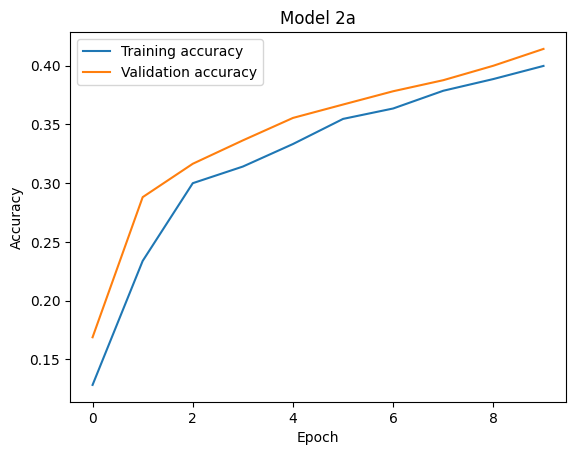

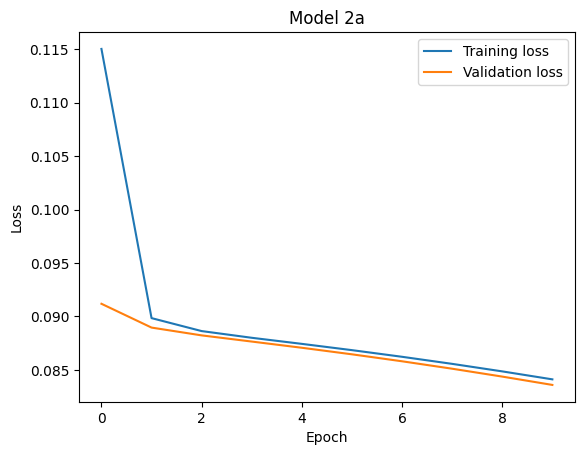

In [221]:
plot_history(history_2a, '2a')

According to the plot, the model still didn't converge yet. While the training accuracy is increasing and the training loss is decreasing, the validation is following a similar pattern. Moreover, in order to test if the model would converge, it was raised the number of epochs from 10 to 60 to allow the model to converge.

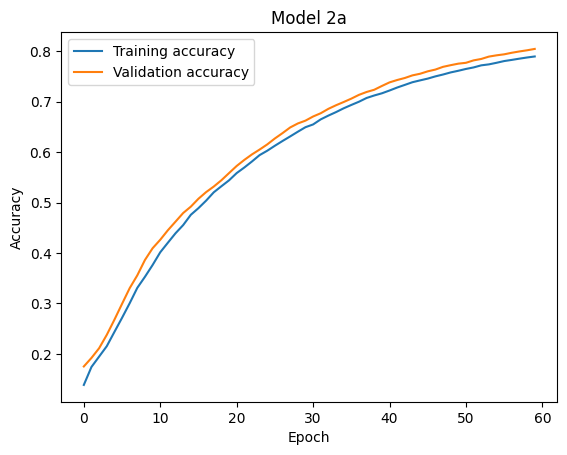

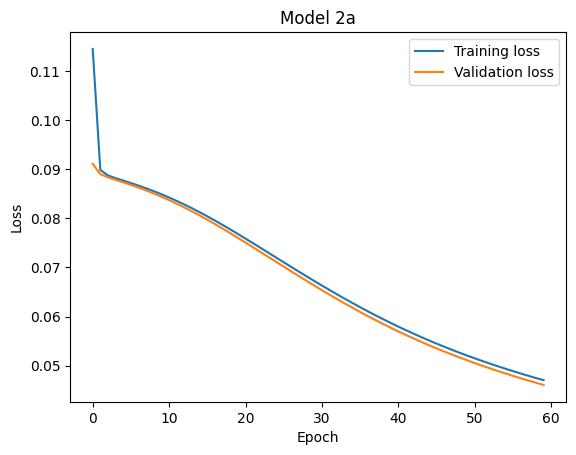

In [222]:
plot_history(history_2a_over_epochs, '2a')

After checking the model trained over 60 epochs, it can be concluded that maybe an increase in the learning rate would help it converge more rapidly. Furthermore, the model still doesn't look like it converged yet (validation and validation are really similar). Maybe testing on another dataset would determine if this logic holds true.

#### Model 2b

In [ ]:
history_2b = model_2b.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10, batch_size=64)

Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.4769 - loss: 2.0206 - val_accuracy: 0.7827 - val_loss: 1.3111
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.7845 - loss: 1.1895 - val_accuracy: 0.8297 - val_loss: 0.8589
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.8326 - loss: 0.8216 - val_accuracy: 0.8595 - val_loss: 0.6646
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.8535 - loss: 0.6563 - val_accuracy: 0.8716 - val_loss: 0.5632
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.8651 - loss: 0.5679 - val_accuracy: 0.8792 - val_loss: 0.5009
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8739 - loss: 0.5121 - val_accuracy: 0.8881 - val_loss: 0.4586
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8821 - loss: 0.4697 - val_accuracy: 0.8920 - val_loss: 0.4288
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8860 - loss: 0.4392 - val_accuracy: 0.

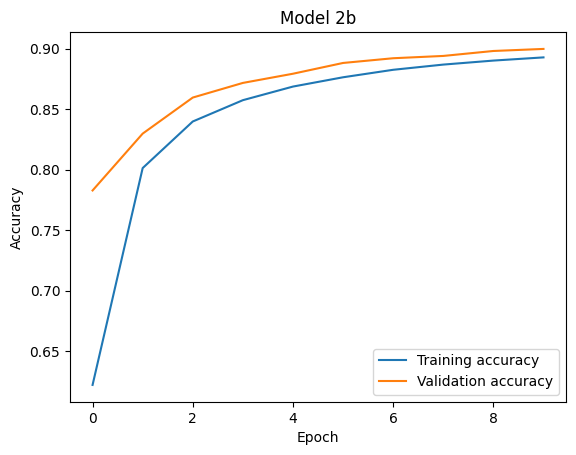

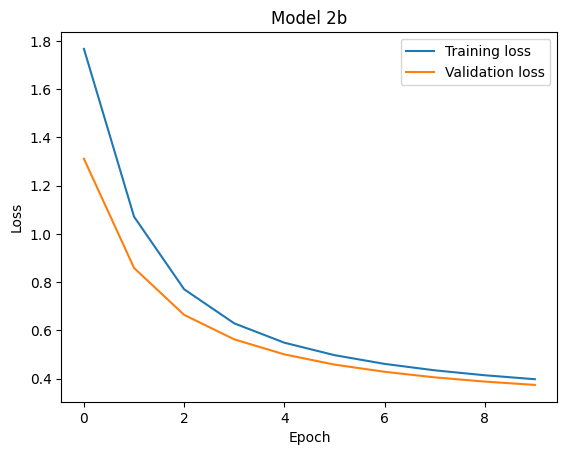

In [224]:
plot_history(history_2b, '2b')

According to the plot, the model perhaps has finished converging. While the training accuracy is increasing and the training loss is decreasing, the validation is following a similar pattern.

#### Model 2c

In [226]:
history_2c = model_2c.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10, batch_size=64)

Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.8171 - loss: 0.7705 - val_accuracy: 0.9263 - val_loss: 0.2596
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9307 - loss: 0.2436 - val_accuracy: 0.9416 - val_loss: 0.1956
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9474 - loss: 0.1825 - val_accuracy: 0.9528 - val_loss: 0.1603
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9586 - loss: 0.1454 - val_accuracy: 0.9599 - val_loss: 0.1346
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9656 - loss: 0.1204 - val_accuracy: 0.9645 - val_loss: 0.1201
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9721 - loss: 0.0987 - val_accuracy: 0.9675 - val_loss: 0.1069
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9767 - loss: 0.0850 - val_accuracy: 0.9700 - val_loss: 0.0988
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9808 - loss: 0.0696 - val_accuracy: 0.

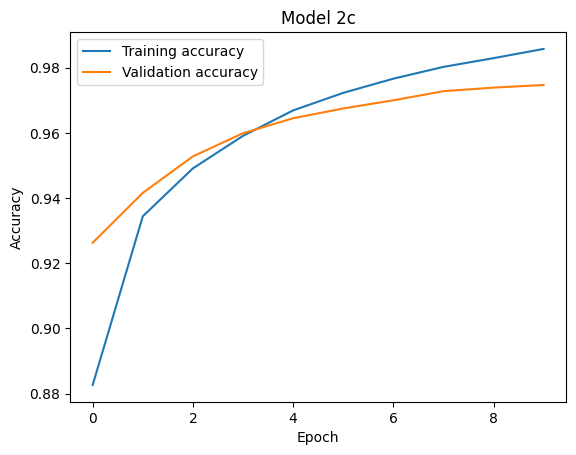

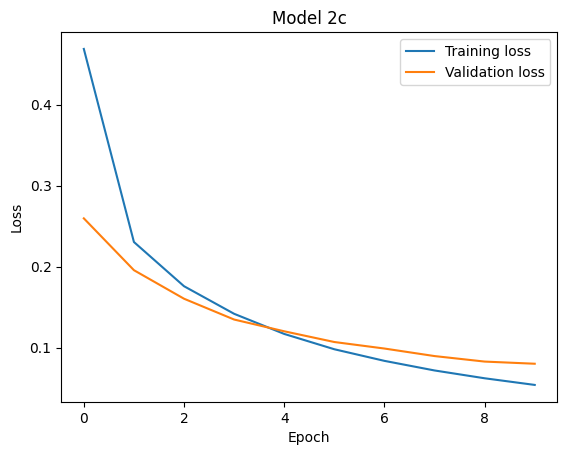

In [227]:
plot_history(history_2c, '2c')

The plot above of the first 10 epochs shows that the models may be starting to overfit, but it cannot be concluded yet, since the difference between accuracy and loss from training and validation are very small (less than 1%). To test if it will suffer from this problem, it can be trained for more epochs. However, even if it is going to overfit, for this current epoch, it's a great model.

#### Model 2d

In [228]:
history_2d = model_2d.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10, batch_size=64)

Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8628 - loss: 0.4982 - val_accuracy: 0.9528 - val_loss: 0.1545
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9599 - loss: 0.1435 - val_accuracy: 0.9676 - val_loss: 0.1151
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9733 - loss: 0.0950 - val_accuracy: 0.9722 - val_loss: 0.0954
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9802 - loss: 0.0722 - val_accuracy: 0.9745 - val_loss: 0.0831
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9839 - loss: 0.0544 - val_accuracy: 0.9760 - val_loss: 0.0816
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9877 - loss: 0.0433 - val_accuracy: 0.9791 - val_loss: 0.0741
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9897 - loss: 0.0358 - val_accuracy: 0.9783 - val_loss: 0.0737
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9916 - loss: 0.0292 - val_accuracy: 0.

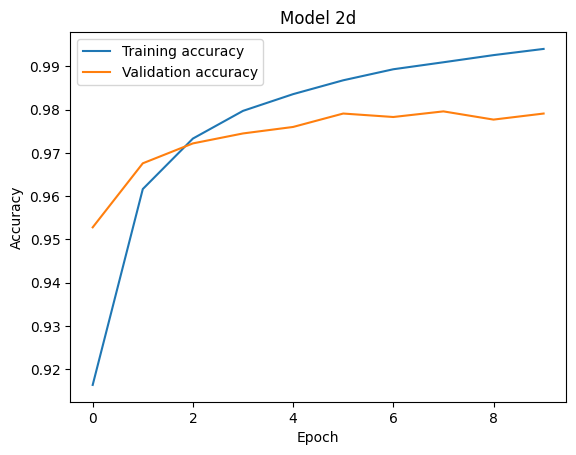

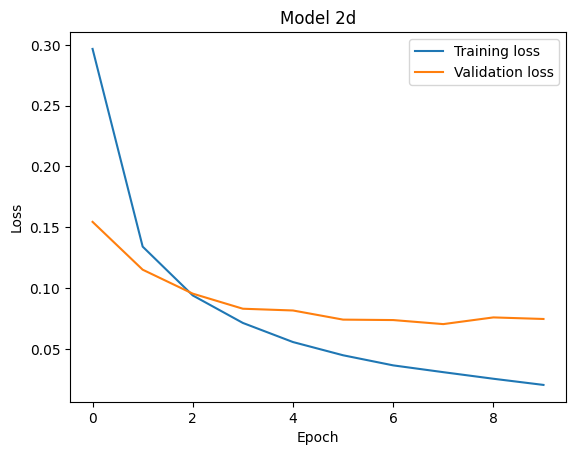

In [229]:
plot_history(history_2d, '2d')

The plot above has a similar analysis as the model 2c, because the validation is being left behind by the training, but the difference is too small to be considered overfitting. However, it's possible to conclude that the model from the epochs between 2 and 4 are probably better than the current one, since it's only getting better on identifying the patterns from training, and not from a general perspective.

#### Model 2e.1

In [230]:
history_2e_1 = model_2e_1.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10, batch_size=64)

Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.8785 - loss: 0.4320 - val_accuracy: 0.9595 - val_loss: 0.1374
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.9666 - loss: 0.1159 - val_accuracy: 0.9698 - val_loss: 0.0974
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.9787 - loss: 0.0718 - val_accuracy: 0.9739 - val_loss: 0.0814
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.9845 - loss: 0.0529 - val_accuracy: 0.9765 - val_loss: 0.0720
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.9887 - loss: 0.0387 - val_accuracy: 0.9812 - val_loss: 0.0652
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.9911 - loss: 0.0296 - val_accuracy: 0.9804 - val_loss: 0.0630
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.9941 - loss: 0.0200 - val_accuracy: 0.9806 - val_loss: 0.0646
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.9953 - loss: 0.0175 - val_accuracy: 0.

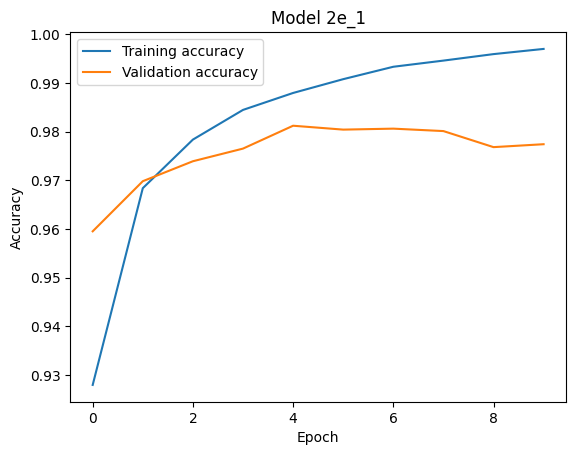

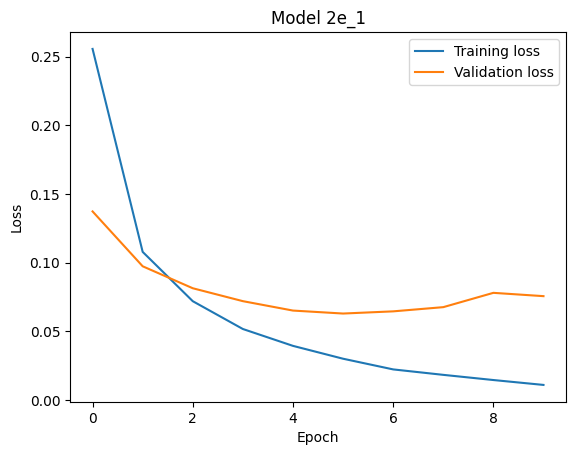

In [231]:
plot_history(history_2e_1, '2e_1')

The plot above has a similar analysis as the model 2c, because the validation is being left behind by the training, and the difference might suggests an overfitting. However, it's possible to conclude that the model from the epochs between 2 and 3 are probably better than the current one, since the current one is only getting better on identifying the patterns from training, and not from a general perspective (doesn't improve very much validation data).

#### Model 2e.2

In [232]:
history_2e_2 = model_2e_2.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10, batch_size=64)

Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8504 - loss: 0.5085 - val_accuracy: 0.9564 - val_loss: 0.1432
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9655 - loss: 0.1177 - val_accuracy: 0.9639 - val_loss: 0.1122
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9765 - loss: 0.0759 - val_accuracy: 0.9735 - val_loss: 0.0876
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9816 - loss: 0.0565 - val_accuracy: 0.9756 - val_loss: 0.0811
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9870 - loss: 0.0429 - val_accuracy: 0.9779 - val_loss: 0.0740
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9891 - loss: 0.0358 - val_accuracy: 0.9766 - val_loss: 0.0735
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9916 - loss: 0.0267 - val_accuracy: 0.9778 - val_loss: 0.0781
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9929 - loss: 0.0223 - val_accuracy: 0.

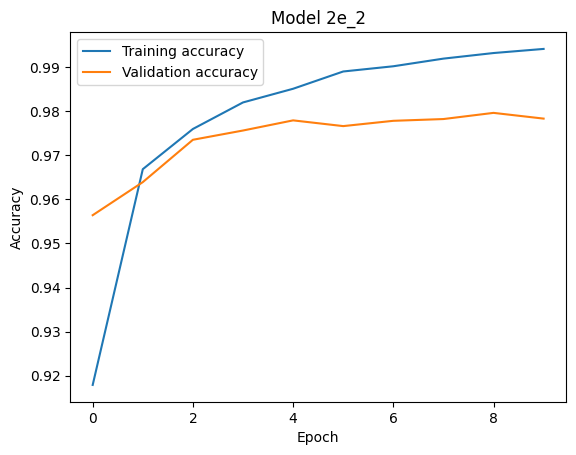

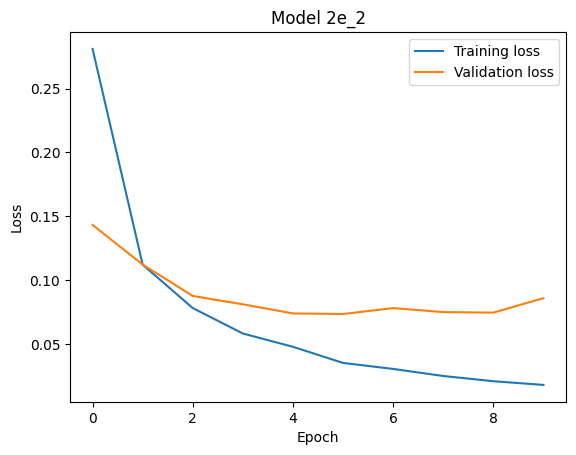

In [233]:
plot_history(history_2e_2, '2e_2')

The plot above has a similar analysis as the model 2c, because the validation is being left behind by the training, so it could be an overfitting. However, it's possible to conclude that the model from the fifth or sixth epoch is probably better than the current one, since the current on is only getting better on identifying the patterns from training, and not from a general perspective (best validation state in on fifth or sixth epoch, although in the second epoch validation hasn't improved much).

## Visualization functions

In [234]:
def visualize_misclassified(model, x_data, y_data, num_samples=5):
    predictions = np.argmax(model.predict(x_data), axis=1)
    incorrect = np.where(predictions != y_data)[0]
    plt.figure(figsize=(10, 10))
    for i, idx in enumerate(incorrect[:num_samples]):
        plt.subplot(1, num_samples, i + 1)
        plt.imshow(x_data[idx], cmap='gray')
        plt.title(f"Pred: {predictions[idx]}, True: {y_data[idx]}")
        plt.axis('off')
    plt.show()

In [235]:
def confusion_matrix_generator(model):
    y_pred = np.argmax(model.predict(x_test), axis=1)
    conf_matrix = confusion_matrix(y_test, y_pred)
    ConfusionMatrixDisplay(conf_matrix, display_labels=range(10)).plot(cmap='Blues', xticks_rotation=45)
    plt.show()

## Results

model_2a
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


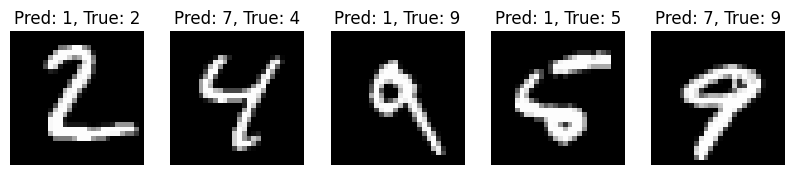

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 636us/step


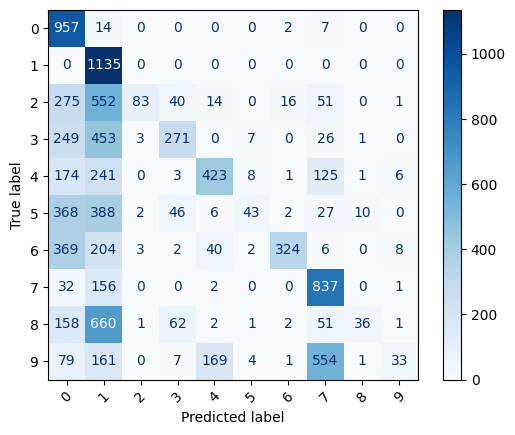

In [236]:
print("model_2a")
visualize_misclassified(model_2a, x_test, y_test)
confusion_matrix_generator(model_2a)

model_2b
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


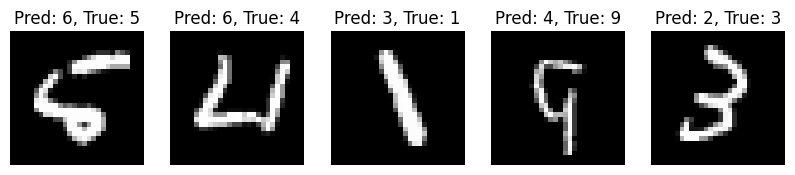

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


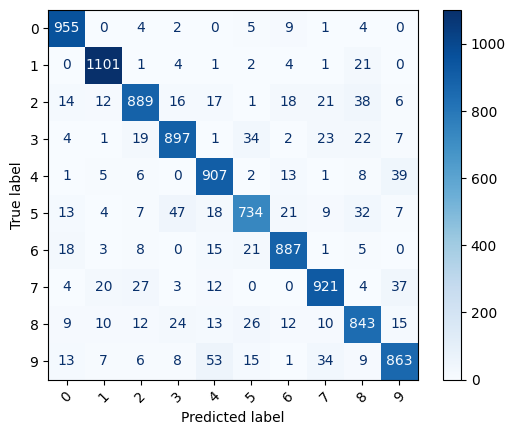

In [237]:
print("model_2b")
visualize_misclassified(model_2b, x_test, y_test)
confusion_matrix_generator(model_2b)

model_2c
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


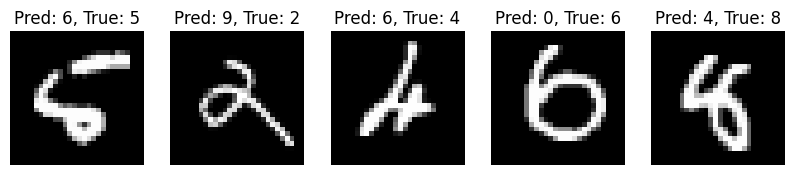

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


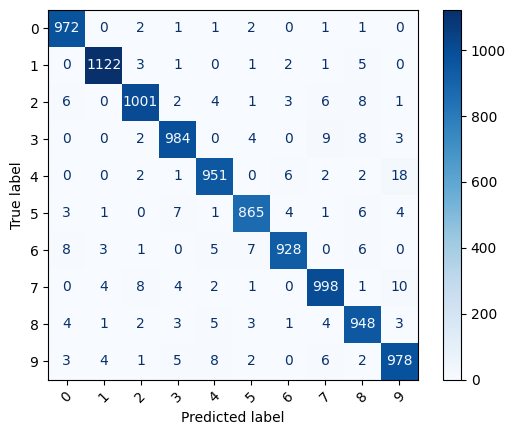

In [238]:
print("model_2c")
visualize_misclassified(model_2c, x_test, y_test)
confusion_matrix_generator(model_2c)

model_2d
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


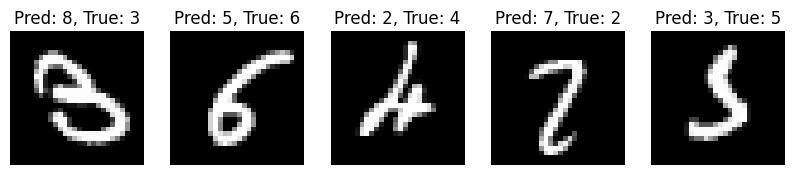

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


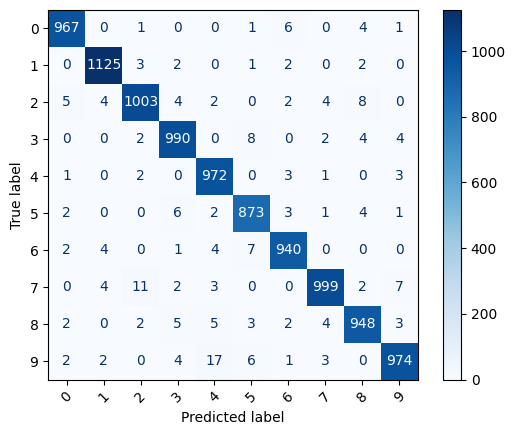

In [239]:
print("model_2d")
visualize_misclassified(model_2d, x_test, y_test)
confusion_matrix_generator(model_2d)

model_2e_1
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


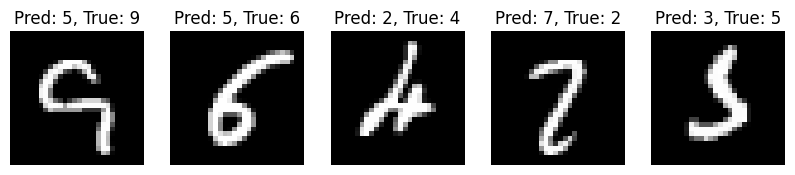

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


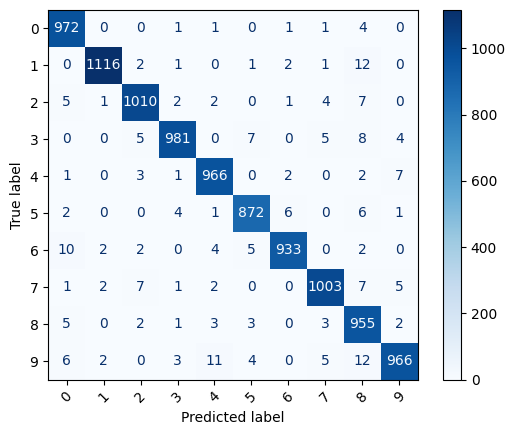

In [240]:
print("model_2e_1")
visualize_misclassified(model_2e_1, x_test, y_test)
confusion_matrix_generator(model_2e_1)

model_2e_2
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


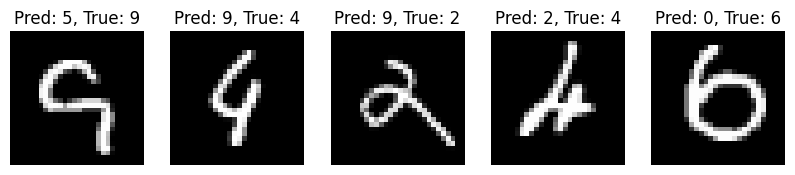

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


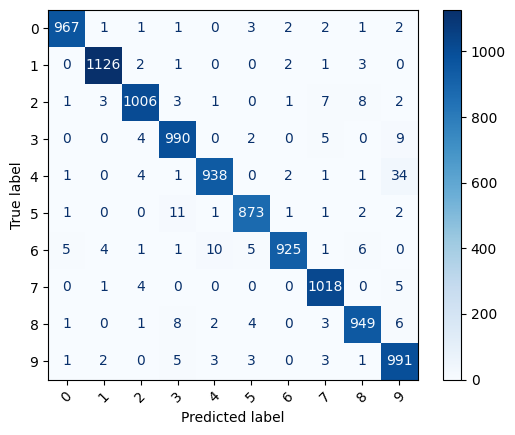

In [241]:
print("model_2e_2")
visualize_misclassified(model_2e_2, x_test, y_test)
confusion_matrix_generator(model_2e_2)